# Forest Cover Type Classification

The exercises on this sheet are graded by a maximum of 25 points. You will be asked to implement several functions.

Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise, we will **predict the forest cover type** (the predominant kind of tree cover) from strictly cartographic variables. 

As in the regression assignment, $Y$   stands for a column vector of "target" values, that is the $i$-th row of $Y$ contains the desired output for the $i$-th data point. Contrary to regression, the elements of $Y$ in this classification task are integer values.

We will work with several popular classifiers provided by Scikit-learn package.

## Submit your notebook to https://forms.gle/xzFX1jbropgdZX4R8 until the  23:59, 24 April, 2022

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. 

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

### Data Dictionary
- Elevation = Elevation in meters.
- Aspect = Aspect in degrees azimuth.
- Slope = Slope in degrees.
- Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.
- Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.
- Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.
- Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.
- Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.
- Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.
- Horizontal_Distance_To_Fire_Points = sHorizontal distance to nearest wildfire ignition points.
- Wilderness_Area1 = Rawah Wilderness Area
- Wilderness_Area2 = Neota Wilderness Area
- Wilderness_Area3 = Comanche Peak Wilderness Area
- Wilderness_Area4 = Cache la Poudre Wilderness Area
- Soil_Type1 to Soil_Type40 (Total 40 Types)
- **Cover_Type** = Forest Cover Type designation. Integer value between 1 and 7, with the following key:

    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz



## Objective: 

We will **predict different cover types** in different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.

## Content:

1) [Load Data] (1 point)

2) [Basic Statistics] (2 points)

3) [Exploratory Data Analysis] (5 points)

4) [Training Models]

4-0) [Data Preparation] (1 point)

4a) [Logistic Regression] (2 points)

4b) [Decision Tree Classifition] (2 points)

4c) [Random Forest] (2 points)

4d) [K Nearest Neighbor] (2 points)
    hyper-parameter tuning (optional)

4e) [Support Vector Machine] (2 points)

5) [Data Imbalance Problem]

5a) [Training with Under-Sampled Data] (3 points)

5b) [Training with Over-Sampled Data] (3 points)

In [2]:
# import packages
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 1) Load data

- Use ```pandas.read_csv()``` to load the data.

In [3]:
data = pd.read_csv('forestcover.csv')

- Visualize the first and the last 5 rows of the data, using ```.head()``` and ```.tail()```.

In [4]:
# See the first records of data
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# See the last records of data
data.tail(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


## 2) Basic statistics
- Print overall info, using ```.info()```.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

- Print dataframe statistics using ```.describe()```.

In [9]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- Check if there are missing values, using ```.isnull().sum()```. If yes, drop them or fill them.

In [52]:
data.isnull().sum().sum()

0

There are no missing values.

## 3) Exploratory Data Analysis
- Show the category distribution, using ```.value_counts()```.

In [29]:
cat_distr = data[['Cover_Type']].value_counts()
cat_distr

Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
dtype: int64

- Visulise this distribution, using ```sns.countplot()```

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

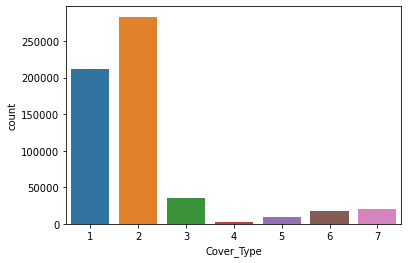

In [35]:
sns.countplot(x="Cover_Type", data=data)

### Feature Histograms 
- Visualize data distribution of the first four features via Histograms using ```sns.distplot()```. (Show four figures.)

In [37]:
first_four_cols = list(data.columns)[:4]

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


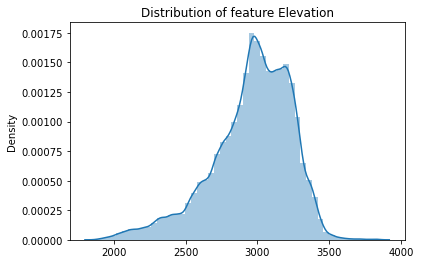

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


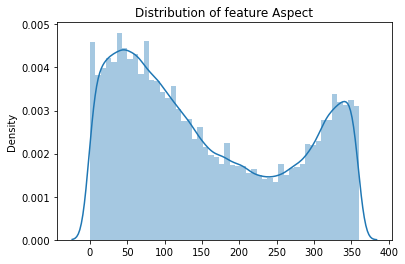

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


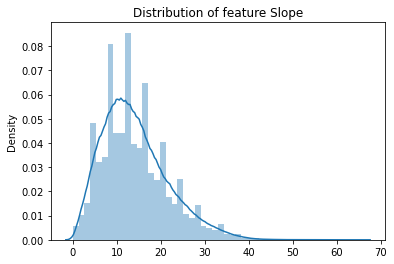

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


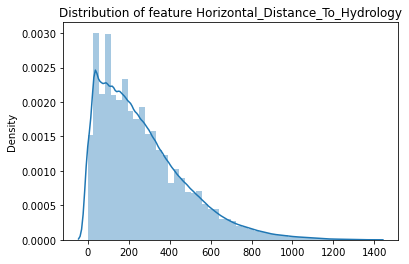

In [48]:
for feat in first_four_cols : 
    x = data[[feat]].values
    sns.distplot(x)
    plt.title('Distribution of feature {}'.format(feat))
    plt.show()

### Correlation between Variables
- Show correlation between variables, using ```sns.heatmap()```. (Since 55 columns are too many, please show here a 10x10 heatmap for the first 10 features.）

<AxesSubplot:>

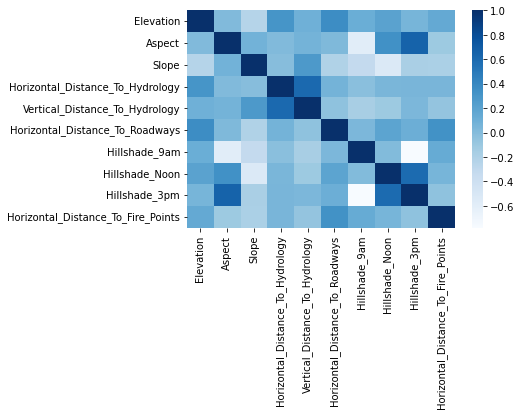

In [51]:
sns.heatmap(data.iloc[:, :10].corr(), cmap="Blues")

### Data Distribution w.r.t. Categories
- Show data distribution w.r.t. categories, using ```sns.boxplot()```. (x-axis: cover type, y-axis: feature variable, please show 10 figures for the first 10 variables.)

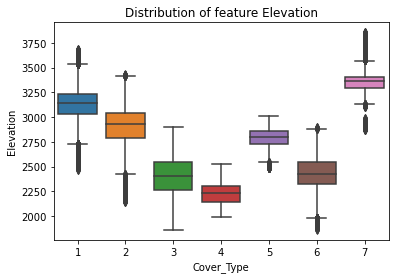

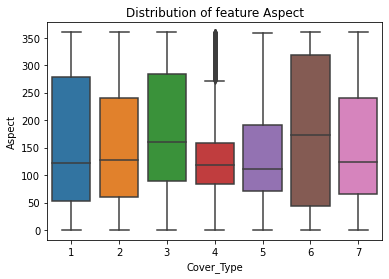

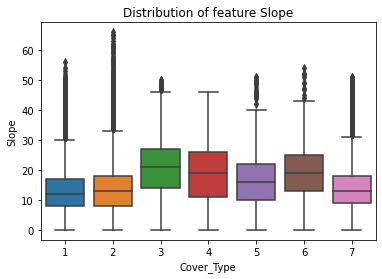

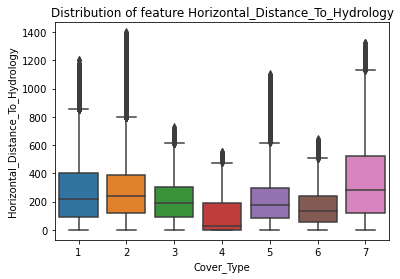

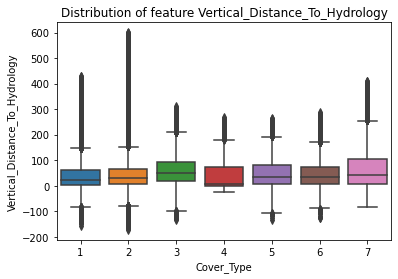

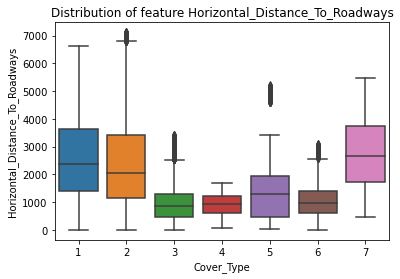

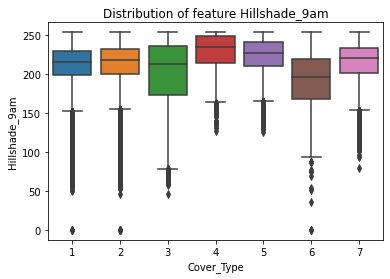

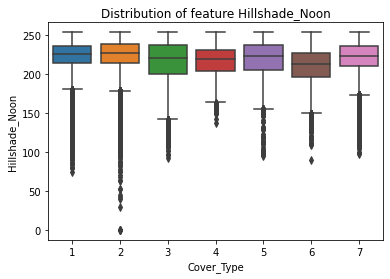

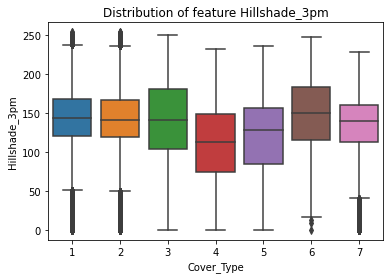

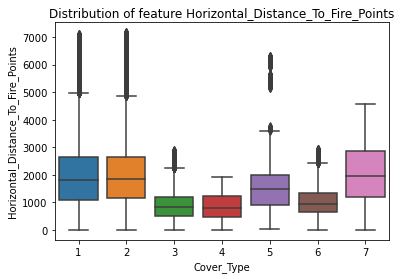

In [56]:
first_ten_cols = list(data.columns)[:10]
for feat in first_ten_cols : 
    sns.boxplot(x="Cover_Type", y=feat, data=data)
    plt.title('Distribution of feature {}'.format(feat))
    plt.show()

- Are there any features which shows not much of variance with respect to classes? Which ones?

If we use as reference the distribution of the feature "Aspect", then the feature Elevation does not show too much variance with respect to classes. Then, Vertical distance to hydrology, and Hillshade noon also display little variance, but have a lot of outliers.

- Which features might do good job in the prediction?

Elevation, Horizontal and Vertical Distance to Hydrology, Hillshades, Distance to fire points. Basically, I would start by using all the features except Aspect. And then, based on the results, remove some of the other features which display a not-too-high but still considerable variance.

## 4) Training Models

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

- Define Feature (X) and Target (y)

In [38]:
X = data[['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']]
y = data[['Cover_Type']]


- Splitting the data into train and test.

    Split the data into train and test with test size and 30% and train size as 70%, use a random seed.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (406708, 7)
Test data size: (174304, 7)


- Normalize data using ```StandardScaler()```

In [41]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X = X_train)
X_test_sc = scaler.transform(X = X_test)

In [42]:
# Extra step : 
y_train = y_train.values.reshape((y_train.values.shape[0],))
y_test = y_test.values.reshape((y_test.values.shape[0],))

### 4a) Logistic Regression
- Train the Linear Regression model

In [86]:
clf = LogisticRegression(random_state = 41, max_iter=200).fit(X_train_sc, y_train)


- Predict on the test data

In [87]:
y_pred = clf.predict(X_test_sc)

- Compute and print performance metrics, using ```accuracy_score()```: the fraction of correctly classified samples.

In [88]:
accuracy_score(y_test, y_pred)

0.6946025335046815

### 4b) Decision Tree Classifition
- Train and test with decision tree classifier
- Print the accuracy

In [89]:
clf = DecisionTreeClassifier(random_state = 41).fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test, y_pred)


0.9134328529465761

### 4c) Random Forest
- Train and test with RandomForestClassifier
- Print the accuracy

In [90]:
clf = RandomForestClassifier(random_state = 41).fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test, y_pred)


0.9481079034330824

### 4d) K Nearest Neighbor
- Train and test with KNN classifier
- Print the accuracy

(It might take a bit long, around an hour if using one cpu core.)

In [91]:
neigh = KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(X_train_sc, y_train)
y_pred = neigh.predict(X_test_sc)
accuracy_score(y_test, y_pred)


0.9134902239765008

### Hyperparameter Tuning (optional)

Let's search a better K (e.g. among candidates \[3,5,11\]) for the KNN classifier, using ```GridSearchCV()```.


- define parameter candidates and grid search

In [93]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters = {'n_neighbors': [3,5,11], 'n_jobs':[-1]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)

- fit the model wtih all grid parameters

In [98]:
clf.fit(X=X_train_sc, y=y_train)

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "sklearn/neighbors/_binary_tree.pxi", line 1057, in sklearn.neighbors._kd_tree.BinaryTree.__setstate__
  File "sklearn/neighbors/_binary_tree.pxi", line 999, in sklearn.neighbors._kd_tree.BinaryTree._update_memviews
  File "stringsource", line 658, in View.MemoryView.memoryview_cwrapper
  File "stringsource", line 349,

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "sklearn/neighbors/_binary_tree.pxi", line 1057, in sklearn.neighbors._kd_tree.BinaryTree.__setstate__
  File "sklearn/neighbors/_binary_tree.pxi", line 999, in sklearn.neighbors._kd_tree.BinaryTree._update_memviews
  File "stringsource", line 658, in View.MemoryView.memoryview_cwrapper
  File "stringsource", line 349,

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "sklearn/neighbors/_binary_tree.pxi", line 1057, in sklearn.neighbors._kd_tree.BinaryTree.__setstate__
  File "sklearn/neighbors/_binary_tree.pxi", line 999, in sklearn.neighbors._kd_tree.BinaryTree._update_memviews
  File "stringsource", line 658, in View.MemoryView.memoryview_cwrapper
  File "stringsource", line 349,

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "sklearn/neighbors/_binary_tree.pxi", line 1057, in sklearn.neighbors._kd_tree.BinaryTree.__setstate__
  File "sklearn/neighbors/_binary_tree.pxi", line 999, in sklearn.neighbors._kd_tree.BinaryTree._update_memviews
  File "stringsource", line 658, in View.MemoryView.memoryview_cwrapper
  File "stringsource", line 349,

/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:775: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/ghjuliasialelli/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "sklearn/neighbors/_binary_tree.pxi", line 1057, in sklearn.neighbors._kd_tree.BinaryTree.__setstate__
  File "sklearn/neighbors/_binary_tree.pxi", line 999, in sklearn.neighbors._kd_tree.BinaryTree._update_memviews
  File "stringsource", line 658, in View.MemoryView.memoryview_cwrapper
  File "stringsource", line 349,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [3, 5, 11]})

- print the best K.

In [99]:
clf.best_params_

{'n_jobs': -1, 'n_neighbors': 3}

- print the test accuracy with this K.

In [100]:
accuracy_score(y_test, y_pred)

0.9134902239765008

### 4e) Support Vector Machine
- Train and test with SVM classifier
- Print the accuracy

(It might take a bit long, around 3 hours if using one cpu core...)

In [ ]:
clf = svm.SVC(random_state=42, verbose=True)
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test, y_pred)

[LibSVM]..............................................................................................................................
*...................*..............................*.
*
optimization finished, #iter = 175743
obj = -155238.572065, rho = 0.884832
nSV = 161087, nBSV = 160251
..
*.*
optimization finished, #iter = 3129
obj = -2008.840098, rho = -1.365102
nSV = 2454, nBSV = 2327
*
optimization finished, #iter = 498
obj = -68.864390, rho = -0.563427
nSV = 206, nBSV = 86
........
*..*...*
optimization finished, #iter = 13104
obj = -7657.673121, rho = -1.492307
nSV = 8443, nBSV = 8238
..
*.*
optimization finished, #iter = 3150
obj = -2178.479350, rho = -1.350715
nSV = 2552, nBSV = 2444
................
*.....*...*
optimization finished, #iter = 23234
obj = -18183.284313, rho = -1.140518
nSV = 20064, nBSV = 19728
........

### Conclusion
Logistic regression was not powerful enough to learn the relation between the features and the cover type. The Decision Tree model proved to be much more able, even more so for the Random Forest model. The KNN model, even after hyper-tuning, performed as well as the Decision Tree model, but not as well as the Random Forest model. The SVM model is _____.

Accuracy score:
- Logistic Regression: 0.695
- Decision Tree: 0.913
- Random Forest: 0.948
- K Nearest Neighbor: 0.9135
- K Nearest Neighbor after hypertuning K (optional): same, 0.9135
- Support Vector Machine: 

Let's go deeper.
## 5) Data imbalance problem

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

Here you can change the dataset that you use to build your predictive model to have more balanced data.

This change is called sampling your dataset and there are two main methods that you can use to even-up the classes:

- 1) You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement); 
- 2) or you can delete instances from the over-represented class, called under-sampling.

Please train Randome Forest classifiers with both under-sampled data and over-sampled data, and compare their accuracy scores.

As we have seen in 3), the data is imbalanced.

### 5a) Training with under-sampled data

- print the size of the smallest class

In [12]:
min_class_size = len(data[data["Cover_Type"]==4])
print("Size of smallest class: ", min_class_size)

Size of smallest class:  2747


- Undersample all the majority classes so that all classes has the same smallest cardinality.

In [25]:
samples = []
for ct in range(1,8) :
    # subsets for each class, using .query()
    class_data = data.query('Cover_Type == {}'.format(ct))
    # downsample each subset, using .sample()
    class_sample = class_data.sample(n=min_class_size, random_state=42)
    samples.append(class_sample)

# concatenate the seven subsets, using .concat(), and shuffle the data (using .sample() on the full set)
under_sampled_data = pd.concat(samples).sample(frac=1)

In [26]:
under_sampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
542273,3528,19,13,511,149,1443,210,212,137,1937,...,0,0,0,0,0,0,0,0,1,7
7429,3421,311,18,525,80,1717,169,225,195,604,...,0,0,0,0,0,0,0,1,0,7
301552,2962,97,14,190,22,2145,242,219,104,446,...,1,0,0,0,0,0,0,0,0,2
272836,2134,95,11,150,39,360,238,224,116,890,...,0,0,0,0,0,0,0,0,0,3
241511,2813,332,23,216,47,1762,159,204,180,1565,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,2470,109,9,376,97,350,235,231,127,437,...,0,0,0,0,0,0,0,0,0,3
233966,2682,332,26,180,82,1256,151,197,181,1947,...,0,0,0,0,0,0,0,0,0,6
179543,2981,257,11,108,18,1634,195,247,190,1500,...,0,0,0,0,0,0,0,0,0,2
369531,3183,88,20,190,14,1271,245,204,80,1239,...,0,0,0,0,0,0,0,0,0,7


- check the class distribution of the undersampled data

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

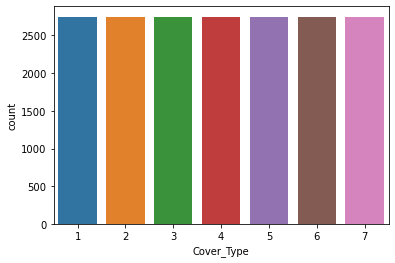

In [27]:
sns.countplot(x="Cover_Type", data=under_sampled_data)

- Preprocessing data (define X, y; train test split; normalize data)

In [28]:
X_under = under_sampled_data[['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']]
y_under = under_sampled_data[['Cover_Type']]

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

# normalise data

scaler = StandardScaler()
X_under_train = scaler.fit_transform(X = X_under_train)
X_under_test = scaler.transform(X = X_under_test)

# Extra step : 
y_under_train = y_under_train.values.reshape((y_under_train.values.shape[0],))
y_under_test = y_under_test.values.reshape((y_under_test.values.shape[0],))


print('Training undersampled data size:',X_under_train.shape)
print('Test undersampled data size:',X_under_test.shape)

Training undersampled data size: (13460, 7)
Test undersampled data size: (5769, 7)


- Train and test random forest classifier on under-sampled data
- Print the accuracy

In [29]:
clf = RandomForestClassifier(random_state = 41).fit(X_under_train, y_under_train)
y_pred = clf.predict(X_under_test)
accuracy_score(y_under_test, y_pred)


0.8299531981279251

### 5b) Training with over-sampled data

- print the size of the largest class

In [30]:
max_class_size = len(data[data["Cover_Type"] == 2])
print("Size of largest class: ", max_class_size)

Size of largest class:  283301


- Oversample the classes.

In [32]:
samples = []
for ct in range(1,8) :
    # subsets for each class, using .query()
    class_data = data.query('Cover_Type == {}'.format(ct))
    # oversample each subset, using .sample()
    if ct == 2 : 
        class_sample = class_data
    else : 
        class_sample = class_data.sample(n=max_class_size, replace=True, random_state=42)
    samples.append(class_sample)

# concatenate the seven subsets, using .concat(), and shuffle the data (using .sample() on the full set)
over_sampled_data = pd.concat(samples).sample(frac=1)

- check the class distribution of the oversampled data

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

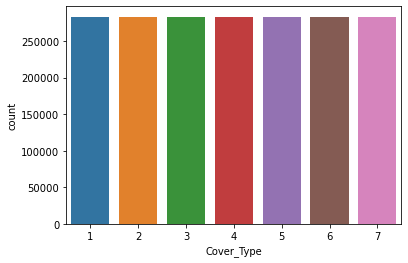

In [33]:
sns.countplot(x="Cover_Type", data=over_sampled_data)

- Preprocessing data (define X, y; train test split; normalize data)

In [35]:
X_over = over_sampled_data[['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']]
y_over = over_sampled_data[['Cover_Type']]

X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

# normalise data

scaler = StandardScaler()
X_over_train = scaler.fit_transform(X = X_over_train)
X_over_test = scaler.transform(X = X_over_test)

# Extra step : 
y_over_train = y_over_train.values.reshape((y_over_train.values.shape[0],))
y_over_test = y_over_test.values.reshape((y_over_test.values.shape[0],))

print('Training oversampled data size:',X_over_train.shape)
print('Test oversampled data size:',X_over_test.shape)

Training oversampled data size: (1388174, 7)
Test oversampled data size: (594933, 7)


- Train and test random forest classifier on over-sampled data
- Print the accuracy

In [36]:
clf = RandomForestClassifier(random_state = 41).fit(X_over_train, y_over_train)
y_pred = clf.predict(X_over_test)
accuracy_score(y_over_test, y_pred)


0.9916377138265989

#### Conclusion on imbalanced data solution (with random forest classifier):
Accuracy:

- imbalanced data: 0.948
- undersampled data: 0.83
- oversampled data: 0.992

TODO In conclusion, it is clear that over-sampling works much better than under-sampling. 